In [2]:
import numpy as np
from numpy import random
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly.express as px
plt.style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("iris.csv")
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.isna().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

In [7]:
counter = df['variety'].value_counts()
labels = counter.index
values = counter.values

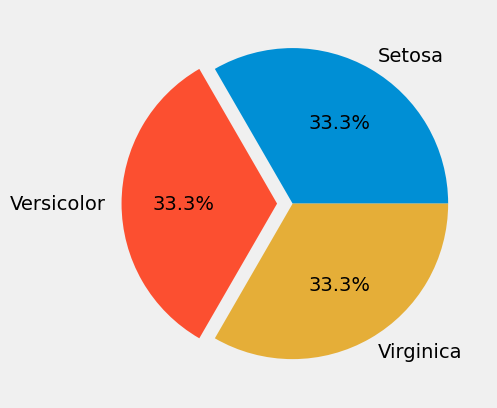

In [8]:
plt.pie(values, labels=labels, autopct="%1.1f%%", explode = [0, .1, 0])
plt.show()

In [9]:
fig = px.scatter(data_frame=df, x ="sepal.length", color='variety')
fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Speal Length'),
                 yaxis=dict(title='Flower Name'))
fig.show()

In [10]:
fig = px.scatter(data_frame=df, x ="sepal.width", color='variety')
fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Speal Width'),
                 yaxis=dict(title='Flower Name'))
fig.show()

In [11]:
fig = px.scatter(data_frame=df, x ="petal.length", color='variety')
fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Petal Length'),
                 yaxis=dict(title='Flower Name'))
fig.show()

In [12]:
fig = px.scatter(data_frame=df, x ="petal.width", color='variety')
fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Petal Width'),
                 yaxis=dict(title='Flower Name'))
fig.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['variety'] = le.fit_transform(df['variety'])
df['variety']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: variety, Length: 150, dtype: int32

In [14]:
X = df.drop('variety', axis=1)
y = df['variety']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True)

In [16]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
SVC = GridSearchCV(SVC(), param_grid, verbose = 1)

In [17]:
SVC.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001]},
             verbose=1)

In [18]:
SVC.best_params_

{'C': 100, 'gamma': 0.01}

In [19]:
y_pred = SVC.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_pred, y_test)

1.0

<Axes: >

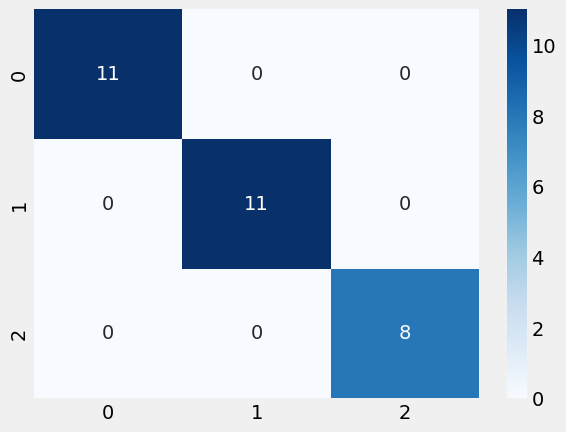

In [21]:
cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot=True, cmap='Blues')

In [22]:
import pickle
with open('iris_model.pkl', 'wb') as file:
    pickle.dump(SVC, file)

In [23]:
with open('iris_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [25]:
loaded_model.predict([[4.9, 3, 1.4, 0.2]])

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



array([0])